<a href="https://colab.research.google.com/github/WatchTheory/College-Admissions/blob/main/College_Admission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Libraries

In [1]:
import pandas as pd
import numpy  as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import pickle

In [2]:
# Import Machine Learning libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression            # linear Regression Model
from sklearn.linear_model import LinearRegression, Ridge     # Ridge Regression
from sklearn.metrics import root_mean_squared_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import classification_report
from sklearn.ensemble import HistGradientBoostingRegressor    # Boosting Regressor
from sklearn.ensemble import RandomForestRegressor            # Random Forest
from bokeh.plotting import figure, show


from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor, RandomForestClassifier

In [3]:
# allows me to view the whole list of columns
# Set option to display all rows (if your output from isna().sum() is very long)
pd.set_option('display.max_rows', None)

# Setting df head to all show all columns
pd.set_option('display.max_columns', None)

## Load The Data

In [5]:
college = pd.read_csv('College.csv')

In [6]:
college.shape

(777, 19)

In [7]:
college.isna().sum()

,0
Unnamed: 0,0
Private,0
Apps,0
Accept,0
Enroll,0
Top10perc,0
Top25perc,0
F.Undergrad,0
P.Undergrad,0
Outstate,0


In [9]:
college.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## Visualize before Cleaning

In [21]:
college.head(15)

,Unnamed: 0,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
5,Albertson College,Yes,587,479,158,38,62,678,41,13500,3335,500,675,?,73,9.4,11,9727,55
6,Albertus Magnus College,Yes,353,340,103,17,45,416,230,13290,5720,500,1500,90,93,11.5,26,8861,63
7,Albion College,Yes,1899,1720,489,37,68,1594,32,13868,4826,450,850,89,100,13.7,37,11487,73
8,Albright College,Yes,1038,839,227,30,63,973,306,15595,4400,300,500,79,84,11.3,23,11644,80
9,Alderson-Broaddus College,Yes,582,498,172,21,44,799,78,10468,3380,660,1800,40,41,11.5,15,8991,52


From this scatterplot it suggest that the pool of accepted student is less than the Graduation Rate, which means the students that apply for a unviersity end up dropping out or don't make it graduation

<Axes: xlabel='Accept', ylabel='F.Undergrad'>

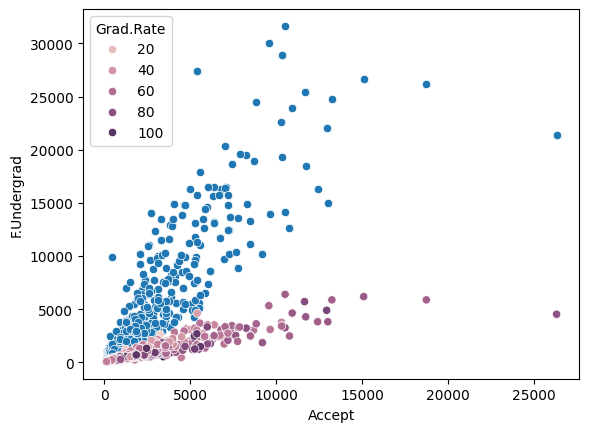

In [19]:
sns.scatterplot(data=college,
                x ='Accept',
                y ='F.Undergrad')

sns.scatterplot(data=college,
             x='Accept',
             y='Enroll',
             hue='Grad.Rate')

<Axes: xlabel='Accept', ylabel='Enroll'>

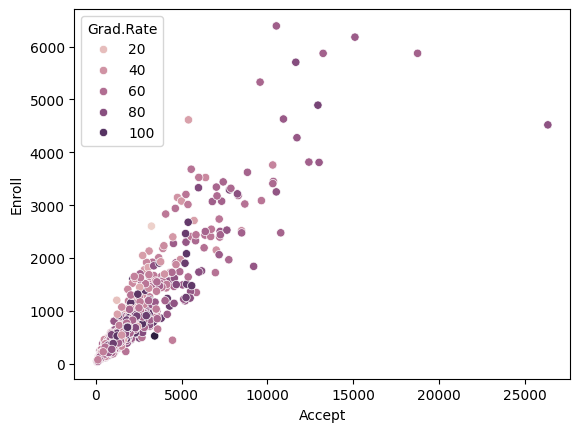

In [18]:
sns.scatterplot(data=college,
             x='Accept',
             y='Enroll',
             hue='Grad.Rate')

<Axes: xlabel='Top25perc', ylabel='Enroll'>

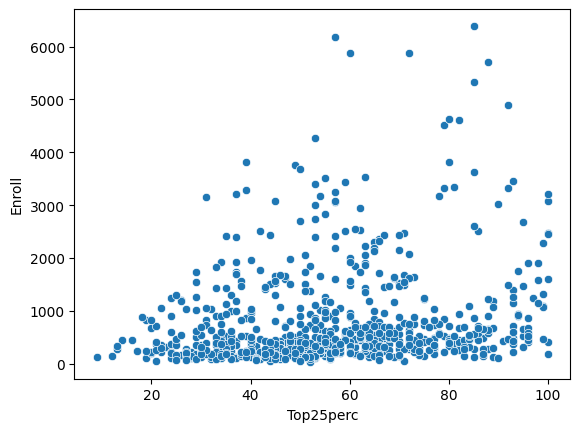

In [23]:
sns.scatterplot(data=college,
                x='Top25perc',
                y='Enroll'
                )

<Axes: xlabel='Top10perc', ylabel='Enroll'>

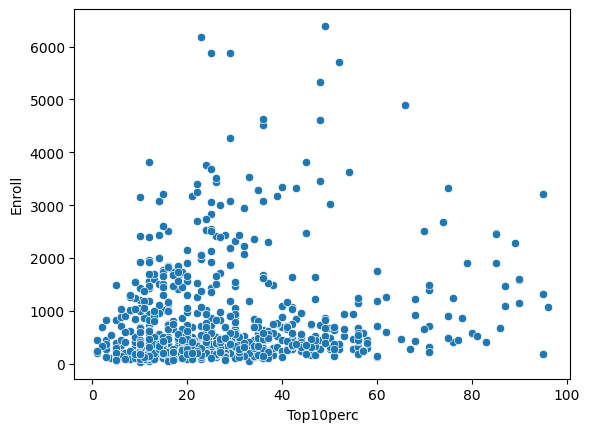

In [25]:
sns.scatterplot(data=college,
                x='Top10perc',
                y='Enroll')

This scatterplot combindes `Top 10 Perc` and `Top 25 Perc`, looking this scatterplot a major of students enroll but is majoritly reduced when it comes to getting into the Top 10 and Top 25 percent

<Axes: xlabel='Top10perc', ylabel='Enroll'>

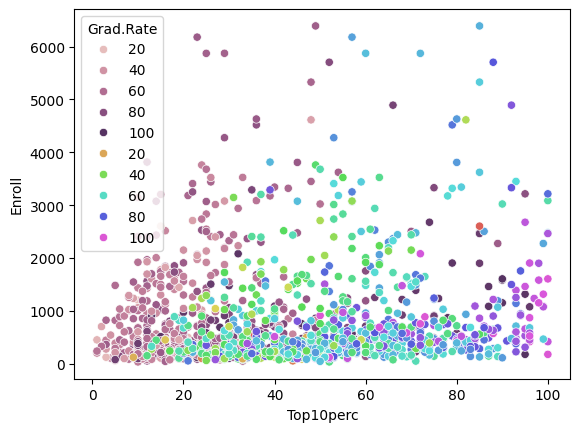

In [35]:
sns.scatterplot(data=college,
                x='Top10perc',
                y='Enroll',
                hue='Grad.Rate')
sns.scatterplot(data=college,
                x='Top25perc',
                y='Enroll',
                hue='Grad.Rate',
                palette="hls"
                )

Here is a box plot that shows all the outliers for each column in the dataset. A majority of the columns have outliers.

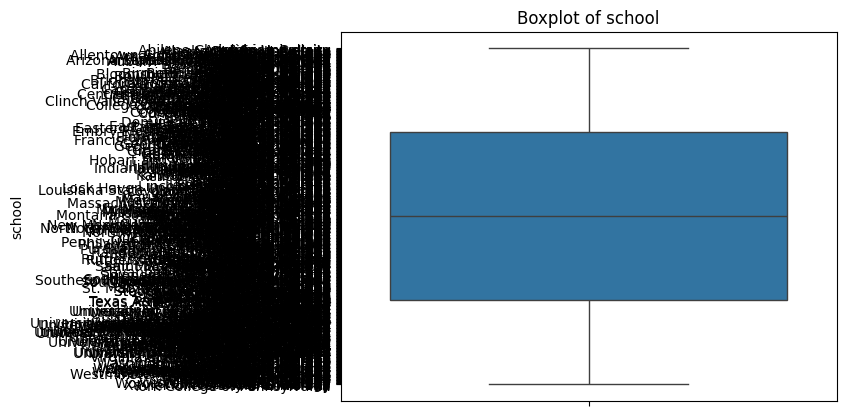

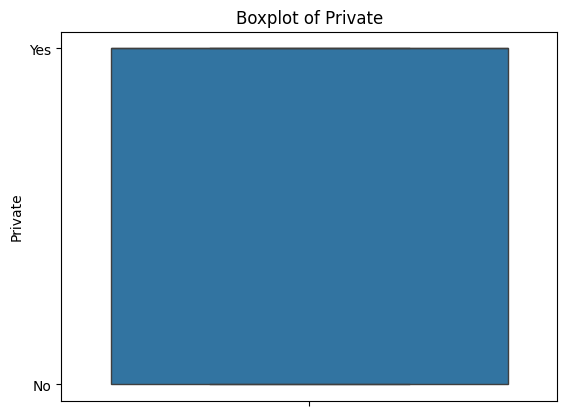

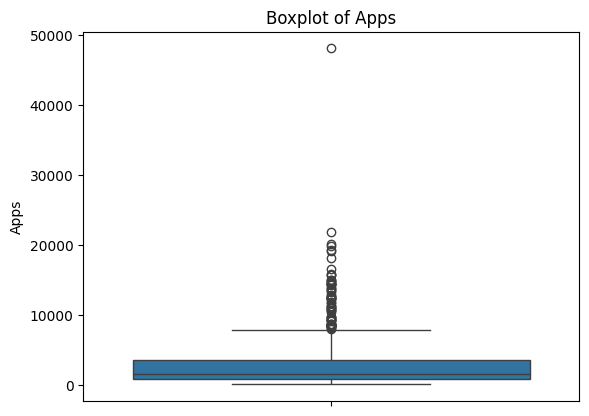

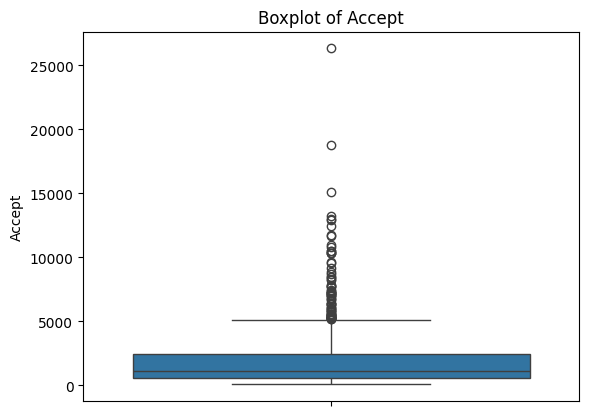

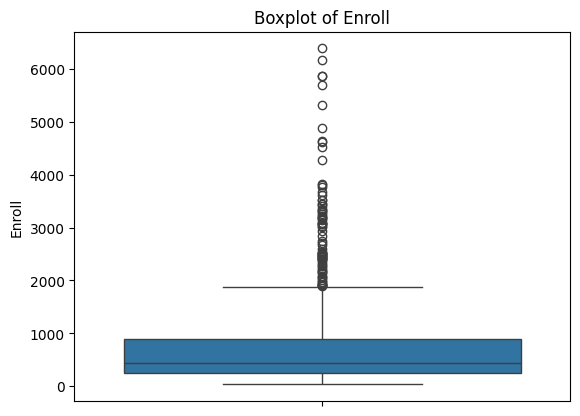

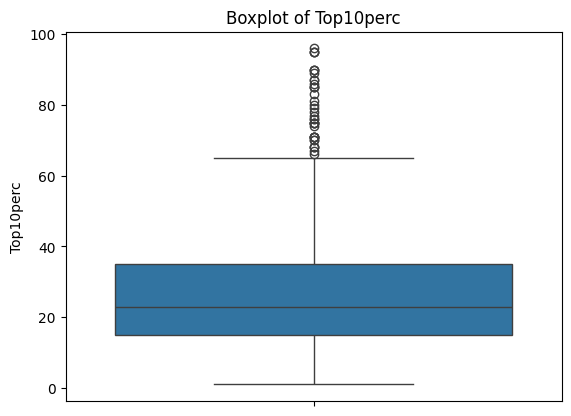

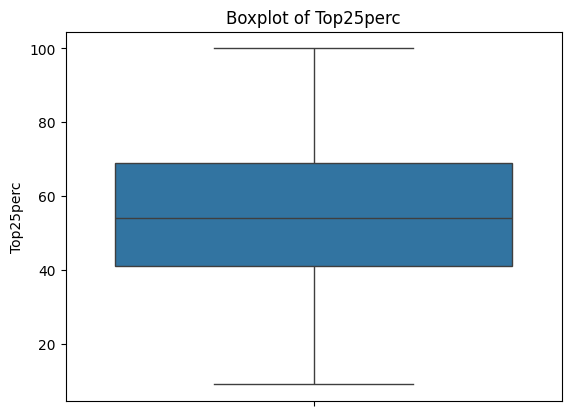

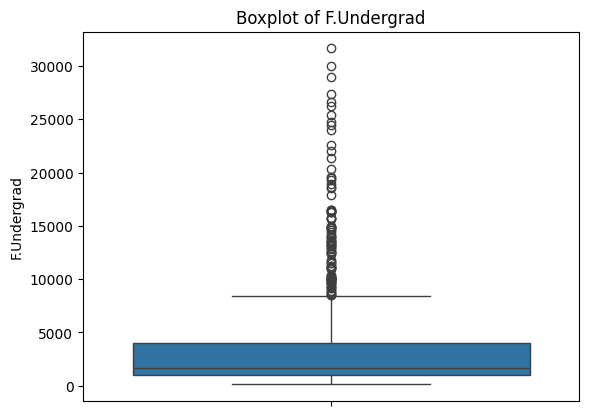

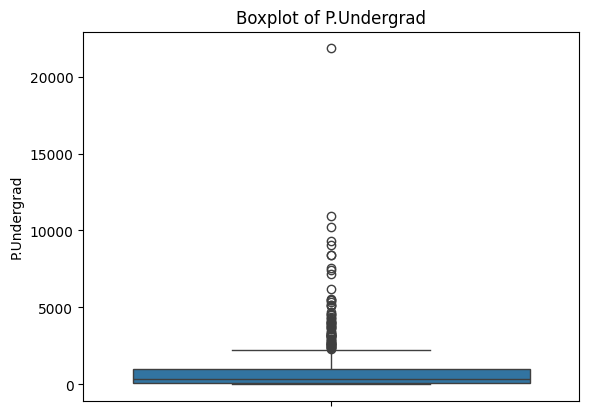

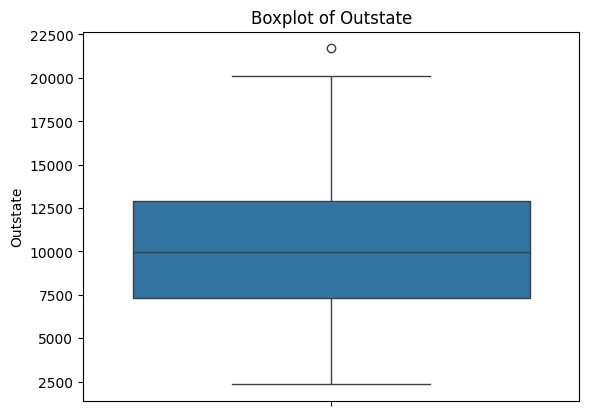

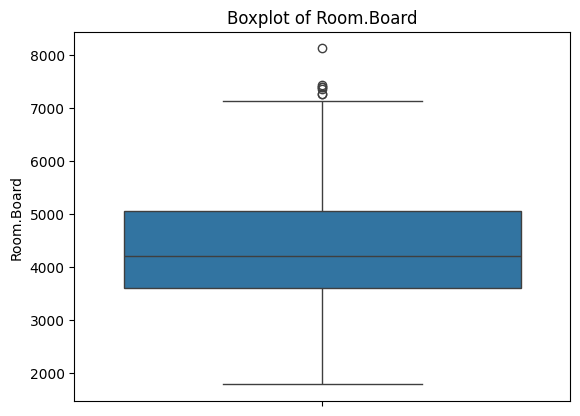

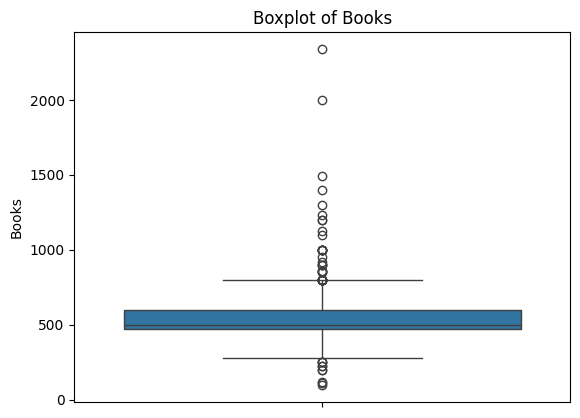

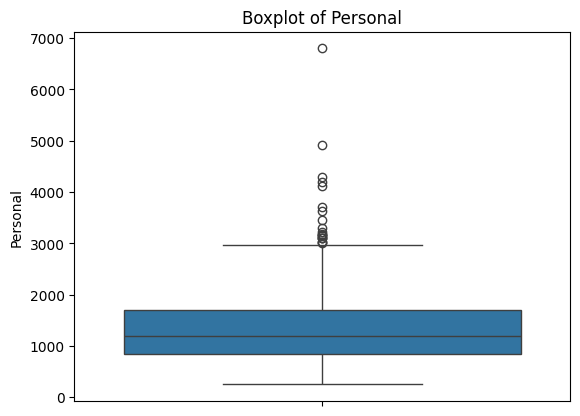

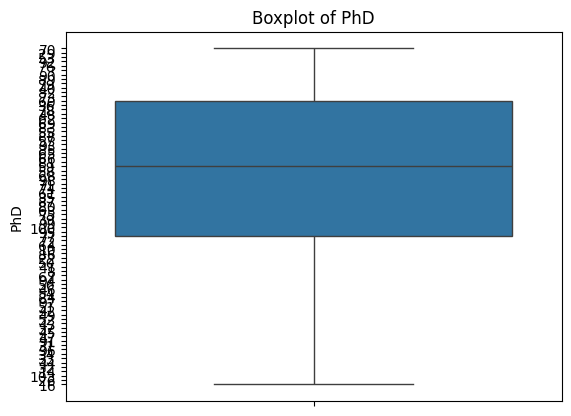

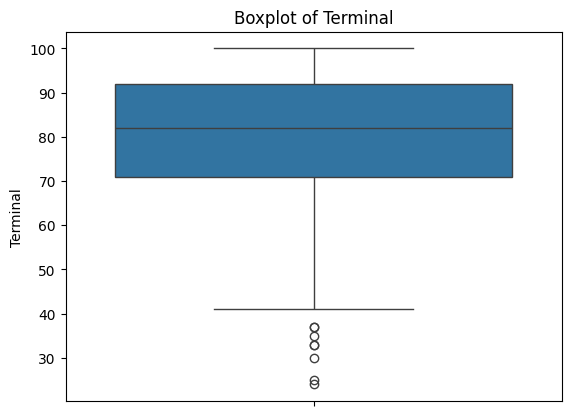

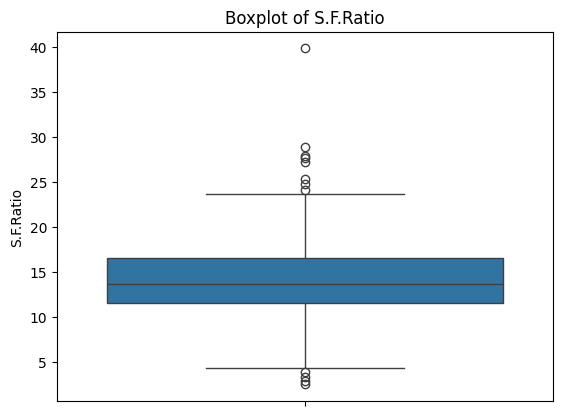

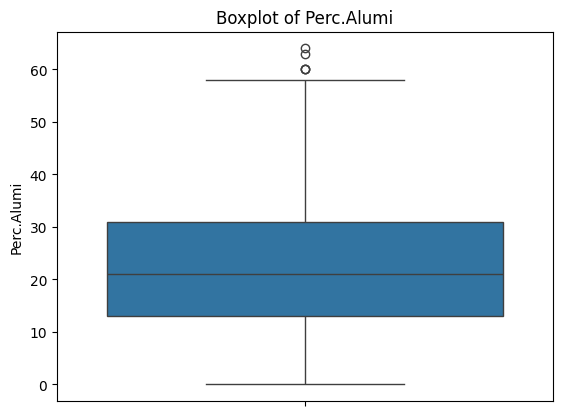

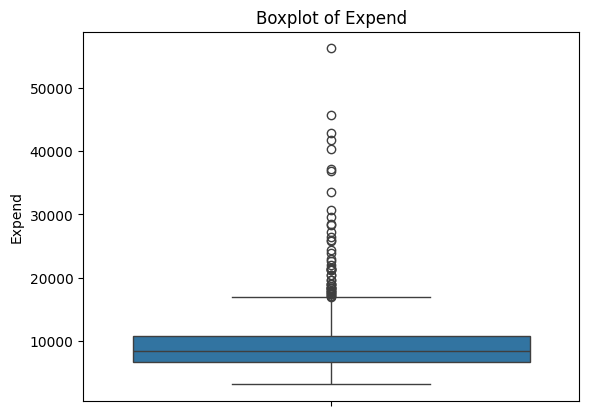

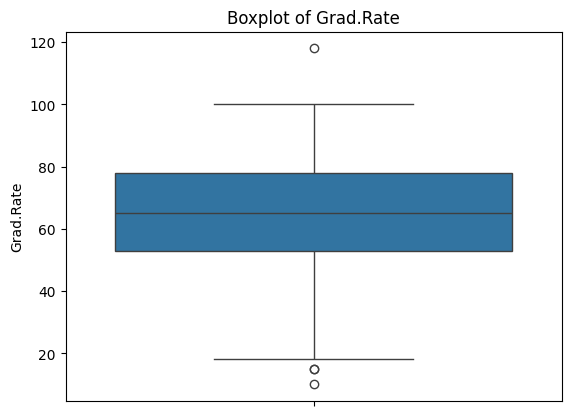

In [44]:
# Create a for loop that, loops through the concrete columns and prints out all columns using seaborn to display outliers
for i in college:
  sns.boxplot(college[i])
  plt.title(f'Boxplot of {i}') # Add a title to each plot
  plt.show() # Display each plot

## Data Cleaning

In [38]:
#rename 'unamed: 0' column
college.rename(columns={'Unnamed: 0': 'school'},inplace=True)

In [40]:
# Rename 'perc.alumni' column
college.rename(columns={'perc.alumni': 'Perc.Alumi'},inplace=True)

In [101]:
print(f'Na values:', str(college.isna().sum().sum()))

Na values: 0


### Final Check

In [41]:
college.head(5)

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [43]:
college.isna().sum()

,0
school,0
Private,0
Apps,0
Accept,0
Enroll,0
Top10perc,0
Top25perc,0
F.Undergrad,0
P.Undergrad,0
Outstate,0


## Visualize After Cleaning

No  cleaning had to be preformed on this dataset, the only thing that was done was rename 2 columns.

In [102]:
college.head()

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [132]:
college_enrolled.head()

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate,TotalUndergrad
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,3422
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,3910
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1135
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,573
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1118


In [125]:
# Create a subset of the data
full = college[['F.Undergrad','P.Undergrad','Outstate','Enroll']]

This is a boxen graph that shows all the Enrolled from `out-of-state`. As you can see there is a steady climb then at the there is a climax, followed by a downward shift, resulting in less students being in enrolled.

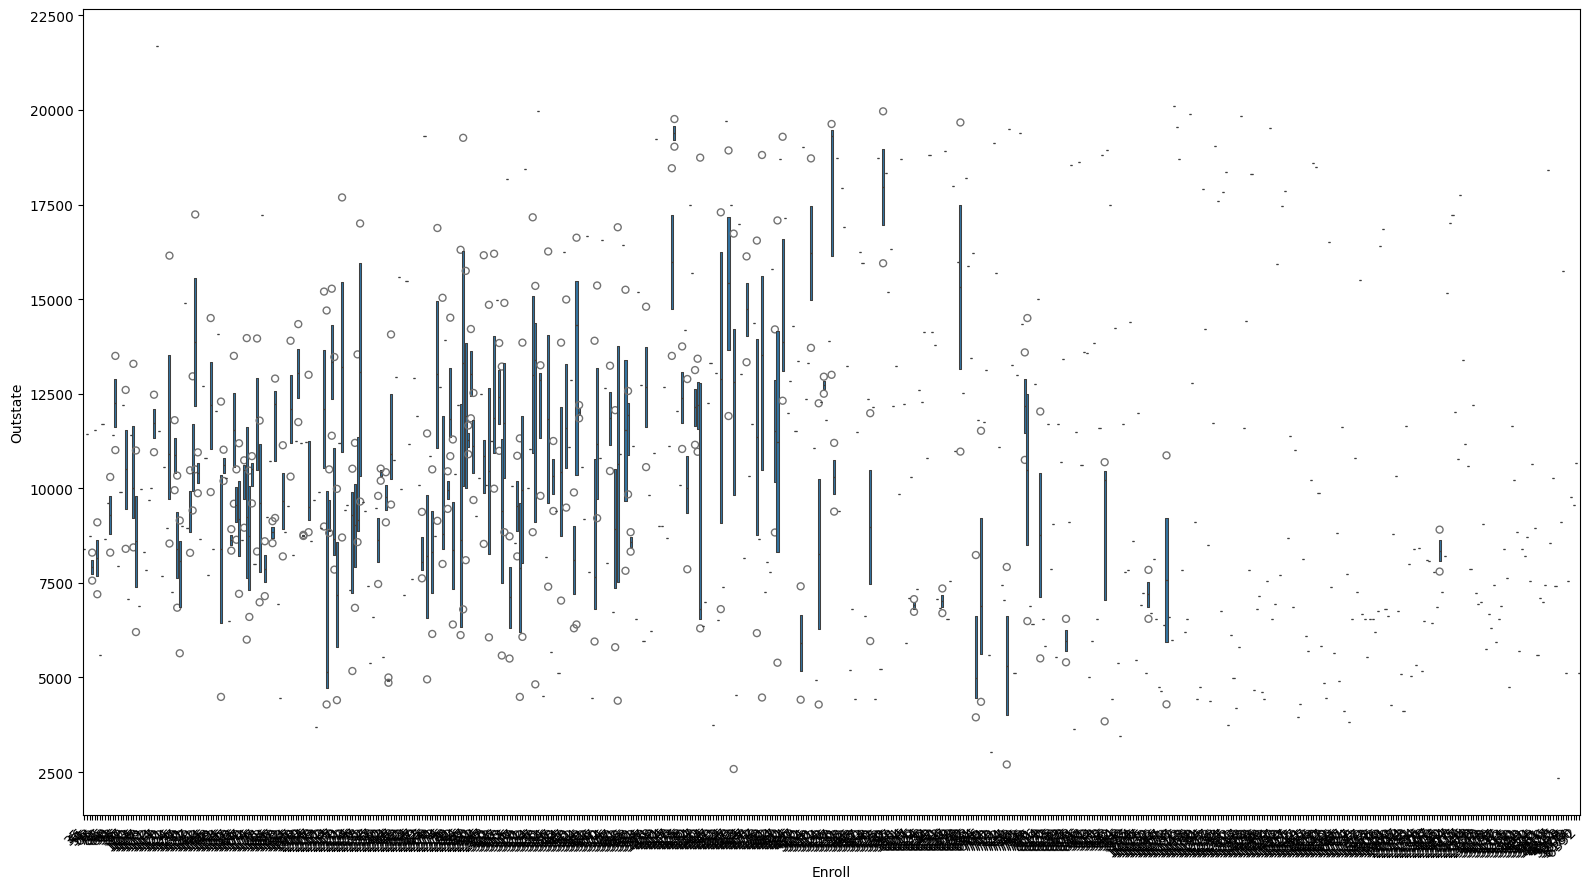

In [131]:
fig, ax = plt.subplots(figsize=(16,9))
sns.boxenplot(data=full,
             x='Enroll',
             y='Outstate',
             )
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for readability
plt.tight_layout()

This is a graph of the `Top 10` and `Top 25` of stundets who are part-time students. From this graph the `Top 25` is growing gradually, while the `top 10` is slowly slowing down.

<Axes: xlabel='Top10perc', ylabel='P.Undergrad'>

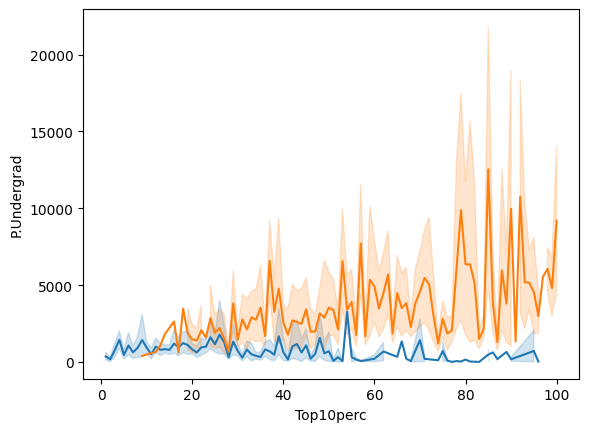

In [135]:
sns.lineplot(data=college_enrolled,
             x='Top10perc',
             y='P.Undergrad')
sns.lineplot(data=college_enrolled,
             x='Top25perc',
             y='F.Undergrad')

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


## EDA

This bar graph shows the total number of both full and part undergrade by creating a new column called `TotalUndergrad`

It shows the average number of undergrad depending on what school type you choose public or private?

From the graph, you can see that public school full time students pay way more than private school students and the same thing with private school, part time students pay more than private school

In [ ]:
# Created a 'enrolled student's function to group Full and Part undergrad students together
college_labeled = college.copy()
college_labeled['CollegeType'] = college_labeled['Private'].map({
    'Yes': 'Private',
   'No': 'Public'
})

enrolled_mean = (
    college_labeled
    .groupby('CollegeType')[['F.Undergrad', 'P.Undergrad']]
    .mean()
    .reset_index()
)

fig = px.bar(
    enrolled_mean,
    x='CollegeType',
    y=['F.Undergrad', 'P.Undergrad'],
    barmode='group',
    title='Average Full vs Part-Time Undergrads by College Type'
)

fig.update_layout(
    xaxis_title='College Type',
    yaxis_title='Average Number of Undergrads'
)

fig.show()


This a stacked bar graph that breaks down the cost of public and private school, as you can see room and board less in public school but students pay in personal funds from public.
With Private school, students will pay more in Room-and-board but will pay a around $9,000 from personal funds

In [89]:
avg_cost = (
    college
    .groupby('Private')[['Room.Board', 'Books', 'Personal']]
    .mean()
    .reset_index()
)
fig = px.bar(
    avg_cost,
    x='Private',
    y=['Room.Board', 'Books', 'Personal'],
    barmode='stack',  # or 'group'
    title='Average Student Costs: Private vs Public Colleges'
)
fig.update_layout(
    xaxis_title='Private College?',
    yaxis_title='Average Annual Cost ($)'
)
fig.show()

## Model

In [88]:
college_enrolled.head()

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate,TotalUndergrad
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,3422
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,3910
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1135
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,573
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1118


From this heatmap, we can see there are a couple of columns we can use for our model. From this graph, we can see that `Grad.Rate` is very high and pairs nicely with `Out of State` column.

<Axes: >

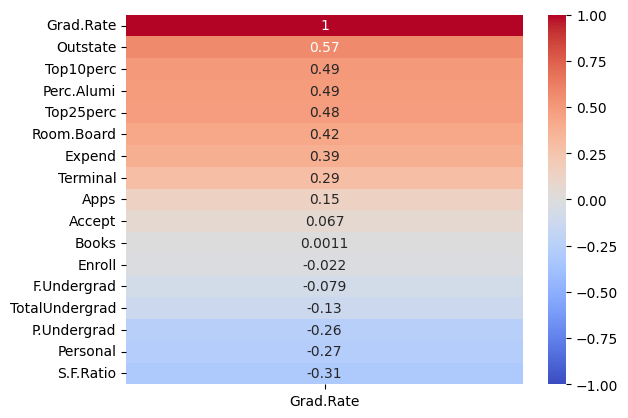

In [86]:
# using a heat map to determine which columns is more useable to run for 'predicting'
sns.heatmap(college_enrolled.corr(numeric_only = True)['Grad.Rate'].sort_values(ascending = False).to_frame(),
            vmin = -1,
            vmax = 1,
            annot = True,
            cmap = 'coolwarm')

In [136]:
college_enrolled.head()

,school,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,Perc.Alumi,Expend,Grad.Rate,TotalUndergrad
0,Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60,3422
1,Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56,3910
2,Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54,1135
3,Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59,573
4,Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15,1118


In [137]:
# Declaring X and Y

# X= crete[['Cement','Superplasticizer']]
# y= crete['Concrete compressive strength']
X = college_enrolled[['Room.Board','Books','Personal']]
y = college_enrolled['Grad.Rate']

In [138]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

In [139]:
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

models = {
    'KNeighborsRegressor': KNeighborsRegressor(),
    'LinearRegression': LinearRegression(),
    'RandomForestRegressor': RandomForestRegressor()
}

scores = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_score = model.score(X_train_scaled, y_train)
    test_score = model.score(X_test_scaled, y_test)
    scores[name] = {'train_score': train_score, 'test_score': test_score}
    print(f"{name}:")
    print(f"  Training Accuracy Score: {train_score:.4f}")
    print(f"  Testing Accuracy Score: {test_score:.4f}")
    print("\n")

KNeighborsRegressor:
  Training Accuracy Score: 0.3527
  Testing Accuracy Score: 0.1058


LinearRegression:
  Training Accuracy Score: 0.2045
  Testing Accuracy Score: 0.2505


RandomForestRegressor:
  Training Accuracy Score: 0.8691
  Testing Accuracy Score: 0.0623




## Final Model

In [140]:
X = college_enrolled[['Room.Board','Books','Personal']]
y = college_enrolled['Grad.Rate']

In [141]:
# Using X and Y split to train and test our data
X_train,X_test,y_train,y_test = train_test_split(X,y, random_state = 42)

In [142]:
sc = StandardScaler()

X_train_sc = sc.fit_transform(X_train)
X_test_sc = sc.transform(X_test)

In [143]:
lr = LinearRegression()

In [144]:
lr.fit(X_train_sc,y_train)

LinearRegression()

In [145]:
# Training accuracy score
lr.score(X_train_sc, y_train)

0.20452768493560192

In [146]:
# Testing accuracy score
lr.score(X_test_sc,y_test)

0.25050791104684134

### Pickel File

In [147]:
# change name of pkl file
EDA_taxi_pkl_file = '/content/drive/MyDrive/Colab Notebooks/Coding_Labs/College Admissions Project/'


# Whatever you call it, you will use it on your docker file
eda_pickel = 'Eda_college_pkl_file'  # <----- change name


# opening your model
    # change out value and put the name of the model for this notebook is called
    # ({change}, file) for whatever you call your model

with open('EDA_college_pkl_file', 'wb') as file:
  model = pickle.dump(lr, file)  # <---- change lr to this notebook model



# loading your model into google colab
# x1 = pickle.load('pkl_file')


# Use to open the Pickel file
# Change 'model' for whatever you call your model
# with open(model, 'rb') as file:
#     model = pickle.load(file)